# the Heston model

a stochastic volatility model

In [4]:
using DifferentialEquations
using Plots

for an asset price, $S_t$, described by

$$
dS = \mu \ S \ dt + \sqrt{v} \ S \ dW_S
$$

with instantaneous volatility, $v$, described by

$$ 
dv = \kappa \ (\theta - v) \ dt + \xi \sqrt{v} \ dW_v
$$

we arrive at a model with 6 parameters:

- $\mu$, the rate of return of the asset
- $\theta$, the long variance, i.e., $\lim_{t \to \infty} v_t$
- $\kappa$, the rate at which $v_t$ reverts to $\theta$
- $\xi$, volatility of the volatility 
- $\rho$, correlation of Wiener processes
- $v_0$, initial volatility



In [38]:
μ = 1.0
θ = 1.0
κ = 1.0
ξ = 1.0
ρ = 0.2
v₀ = 1.0

S₀ = 100.0

function f(du, u, p, t)
    du[1] = μ * u[1]
    du[2] = κ * (θ - u[2])
end

function g(du, u, p, t)
    du[1] = u[1] * √u[2]
    du[2] = ξ * √u[2]
end

Γ = [1.0 ρ; ρ 1.0]

u₀ = [S₀, v₀]

tspan = (0.0, 1.0)

heston_noise = CorrelatedWienerProcess!(Γ, tspan[1], zeros(2), zeros(2))

prob = SDEProblem(f, g, u₀, tspan, noise=heston_noise);

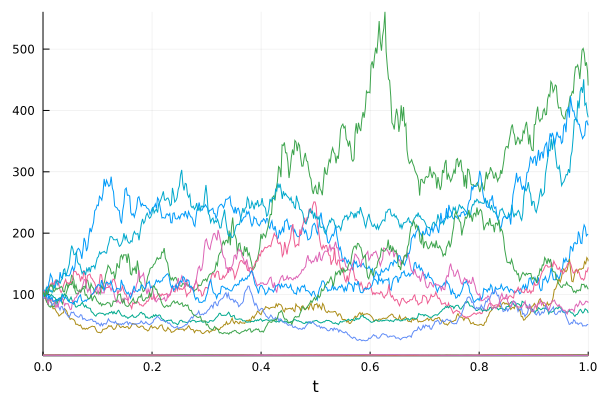

In [58]:
ensembleprob = EnsembleProblem(prob)
sim = solve(ensembleprob, SOSRI(), trajectories=10)
plot(sim)